# Task 1: Data Preprocessing and Exploration
## GMF Investments - Portfolio Optimization

**Objective:** Load, clean, and understand historical financial data for TSLA, BND, and SPY to prepare it for forecasting models.

**Period:** January 1, 2015 to January 15, 2026

### Assets:
- **TSLA (Tesla):** High-growth stock - High risk, high potential return
- **BND (Vanguard Total Bond Market ETF):** U.S. investment-grade bonds - Low risk, stability
- **SPY (S&P 500 ETF):** Market index tracker - Moderate risk, broad exposure

In [1]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Extract Historical Financial Data

In [ ]:
# Define assets and time period
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2026-01-15'

# Download data for all tickers
print(f"Downloading data from {start_date} to {end_date}...")
data = {}

for ticker in tickers:
    print(f"Fetching {ticker}...")
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    
    # Handle multi-level columns if present (yfinance sometimes returns multi-level columns)
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(1)
    
    data[ticker] = df
    print(f"{ticker}: {len(data[ticker])} trading days")

print("\nData extraction completed!")

Fetching TSLA...
TSLA: 2775 trading days
Fetching BND...
BND: 2775 trading days
Fetching SPY...
SPY: 2775 trading days

Data extraction completed!


In [3]:
# Display basic information for each asset
for ticker in tickers:
    print(f"\n{'='*60}")
    print(f"{ticker} Dataset Overview")
    print(f"{'='*60}")
    print(f"\nShape: {data[ticker].shape}")
    print(f"\nFirst few rows:")
    print(data[ticker].head())
    print(f"\nLast few rows:")
    print(data[ticker].tail())
    print(f"\nData types:")
    print(data[ticker].dtypes)


TSLA Dataset Overview

Shape: (2775, 5)

First few rows:
Price        Close    High     Low    Open    Volume
Ticker        TSLA    TSLA    TSLA    TSLA      TSLA
Date                                                
2015-01-02 14.6207 14.8833 14.2173 14.8580  71466000
2015-01-05 14.0060 14.4333 13.8107 14.3033  80527500
2015-01-06 14.0853 14.2800 13.6140 14.0040  93928500
2015-01-07 14.0633 14.3187 13.9853 14.2233  44526000
2015-01-08 14.0413 14.2533 14.0007 14.1873  51637500

Last few rows:
Price         Close     High      Low     Open    Volume
Ticker         TSLA     TSLA     TSLA     TSLA      TSLA
Date                                                    
2026-01-08 435.8000 436.8900 424.3700 427.8900  57041100
2026-01-09 445.0100 449.0500 430.3900 435.9500  67331500
2026-01-12 448.9600 454.3000 438.0000 441.2300  61649600
2026-01-13 447.2000 451.8100 443.9500 450.2000  53719200
2026-01-14 439.2000 443.9100 434.2200 442.8100  57259500

Data types:
Price   Ticker
Close   TSLA      

## 2. Data Cleaning and Understanding

In [4]:
# Check for missing values
print("Missing Values Analysis")
print("="*60)
for ticker in tickers:
    missing = data[ticker].isnull().sum()
    missing_pct = (missing / len(data[ticker])) * 100
    print(f"\n{ticker}:")
    print(f"Total missing values:\n{missing}")
    print(f"\nPercentage missing:\n{missing_pct}")
    
# Check for any duplicate dates
print("\n" + "="*60)
print("Duplicate Dates Check")
print("="*60)
for ticker in tickers:
    duplicates = data[ticker].index.duplicated().sum()
    print(f"{ticker}: {duplicates} duplicate dates")

Missing Values Analysis

TSLA:
Total missing values:
Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

Percentage missing:
Price   Ticker
Close   TSLA     0.0000
High    TSLA     0.0000
Low     TSLA     0.0000
Open    TSLA     0.0000
Volume  TSLA     0.0000
dtype: float64

BND:
Total missing values:
Price   Ticker
Close   BND       0
High    BND       0
Low     BND       0
Open    BND       0
Volume  BND       0
dtype: int64

Percentage missing:
Price   Ticker
Close   BND      0.0000
High    BND      0.0000
Low     BND      0.0000
Open    BND      0.0000
Volume  BND      0.0000
dtype: float64

SPY:
Total missing values:
Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64

Percentage missing:
Price   Ticker
Close   SPY      0.0000
High    SPY      0.0000
Low     SPY      0.0000
Open    SPY      0.0000
Volume  SPY      0.0000
dtype: fl

In [5]:
# Handle missing values (if any) by forward filling
for ticker in tickers:
    if data[ticker].isnull().any().any():
        print(f"Filling missing values in {ticker}...")
        data[ticker] = data[ticker].fillna(method='ffill').fillna(method='bfill')
    else:
        print(f"{ticker}: No missing values to handle")

# Verify no missing values remain
print("\nVerification - Remaining missing values:")
for ticker in tickers:
    print(f"{ticker}: {data[ticker].isnull().sum().sum()}")

TSLA: No missing values to handle
BND: No missing values to handle
SPY: No missing values to handle

Verification - Remaining missing values:
TSLA: 0
BND: 0
SPY: 0


In [6]:
# Basic statistics for each asset
for ticker in tickers:
    print(f"\n{'='*60}")
    print(f"{ticker} - Descriptive Statistics")
    print(f"{'='*60}")
    print(data[ticker].describe())


TSLA - Descriptive Statistics
Price      Close      High       Low      Open         Volume
Ticker      TSLA      TSLA      TSLA      TSLA           TSLA
count  2775.0000 2775.0000 2775.0000 2775.0000      2775.0000
mean    138.4729  141.5341  135.2712  138.5059 110848034.5946
std     131.6821  134.6163  128.6688  131.7913  71453654.9941
min       9.5780   10.3313    9.4033    9.4880  10620000.0000
25%      17.8517   18.0870   17.5880   17.8367  67581500.0000
50%      91.6260   94.4840   89.1140   93.0667  92646000.0000
75%     242.0283  247.8467  236.9783  242.9017 128236550.0000
max     489.8800  498.8300  485.3300  489.8800 914082000.0000

BND - Descriptive Statistics
Price      Close      High       Low      Open        Volume
Ticker       BND       BND       BND       BND           BND
count  2775.0000 2775.0000 2775.0000 2775.0000     2775.0000
mean     67.3257   67.4245   67.2249   67.3282  4485147.6036
std       4.6853    4.6922    4.6763    4.6852  2918896.1449
min      59.69

## 3. Exploratory Data Analysis (EDA)

### 3.1 Closing Price Trends Over Time

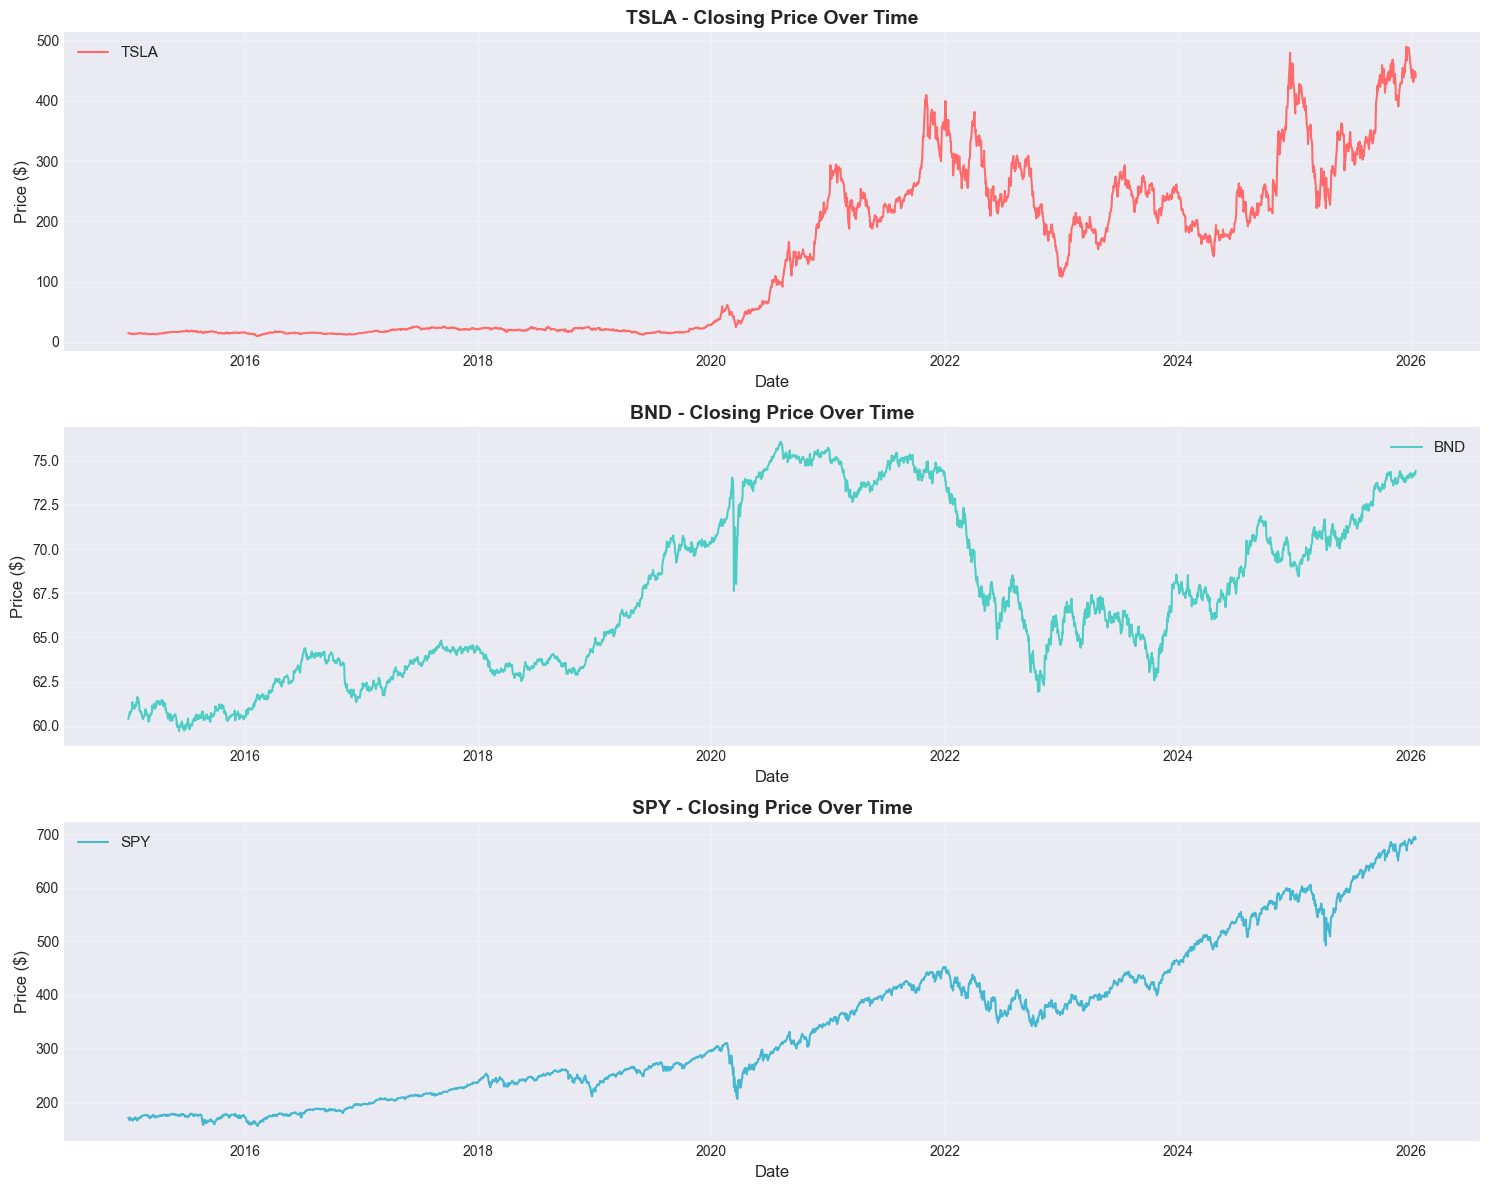

Key Insights:

TSLA:
  Start Price (2015-01-01): $14.62
  End Price (Latest): $439.20
  Total Return: 2903.97%

BND:
  Start Price (2015-01-01): $60.39
  End Price (Latest): $74.43
  Total Return: 23.26%

SPY:
  Start Price (2015-01-01): $170.59
  End Price (Latest): $690.36
  Total Return: 304.69%


In [9]:
# Plot closing prices for all assets
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, ticker in enumerate(tickers):
    # Extract Close column and handle potential Series/DataFrame differences
    close_prices = data[ticker]['Close']
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]
    
    axes[idx].plot(data[ticker].index, close_prices, 
                   color=colors[idx], linewidth=1.5, label=ticker)
    axes[idx].set_title(f'{ticker} - Closing Price Over Time', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=12)
    axes[idx].set_ylabel('Price ($)', fontsize=12)
    axes[idx].legend(loc='best', fontsize=11)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key insights
print("Key Insights:")
print("="*60)
for ticker in tickers:
    close_prices = data[ticker]['Close']
    # Handle both Series and DataFrame cases
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]
    
    start_price = float(close_prices.iloc[0])
    end_price = float(close_prices.iloc[-1])
    total_return = ((end_price - start_price) / start_price) * 100
    print(f"\n{ticker}:")
    print(f"  Start Price (2015-01-01): ${start_price:.2f}")
    print(f"  End Price (Latest): ${end_price:.2f}")
    print(f"  Total Return: {total_return:.2f}%")

### 3.2 Daily Percentage Change and Volatility

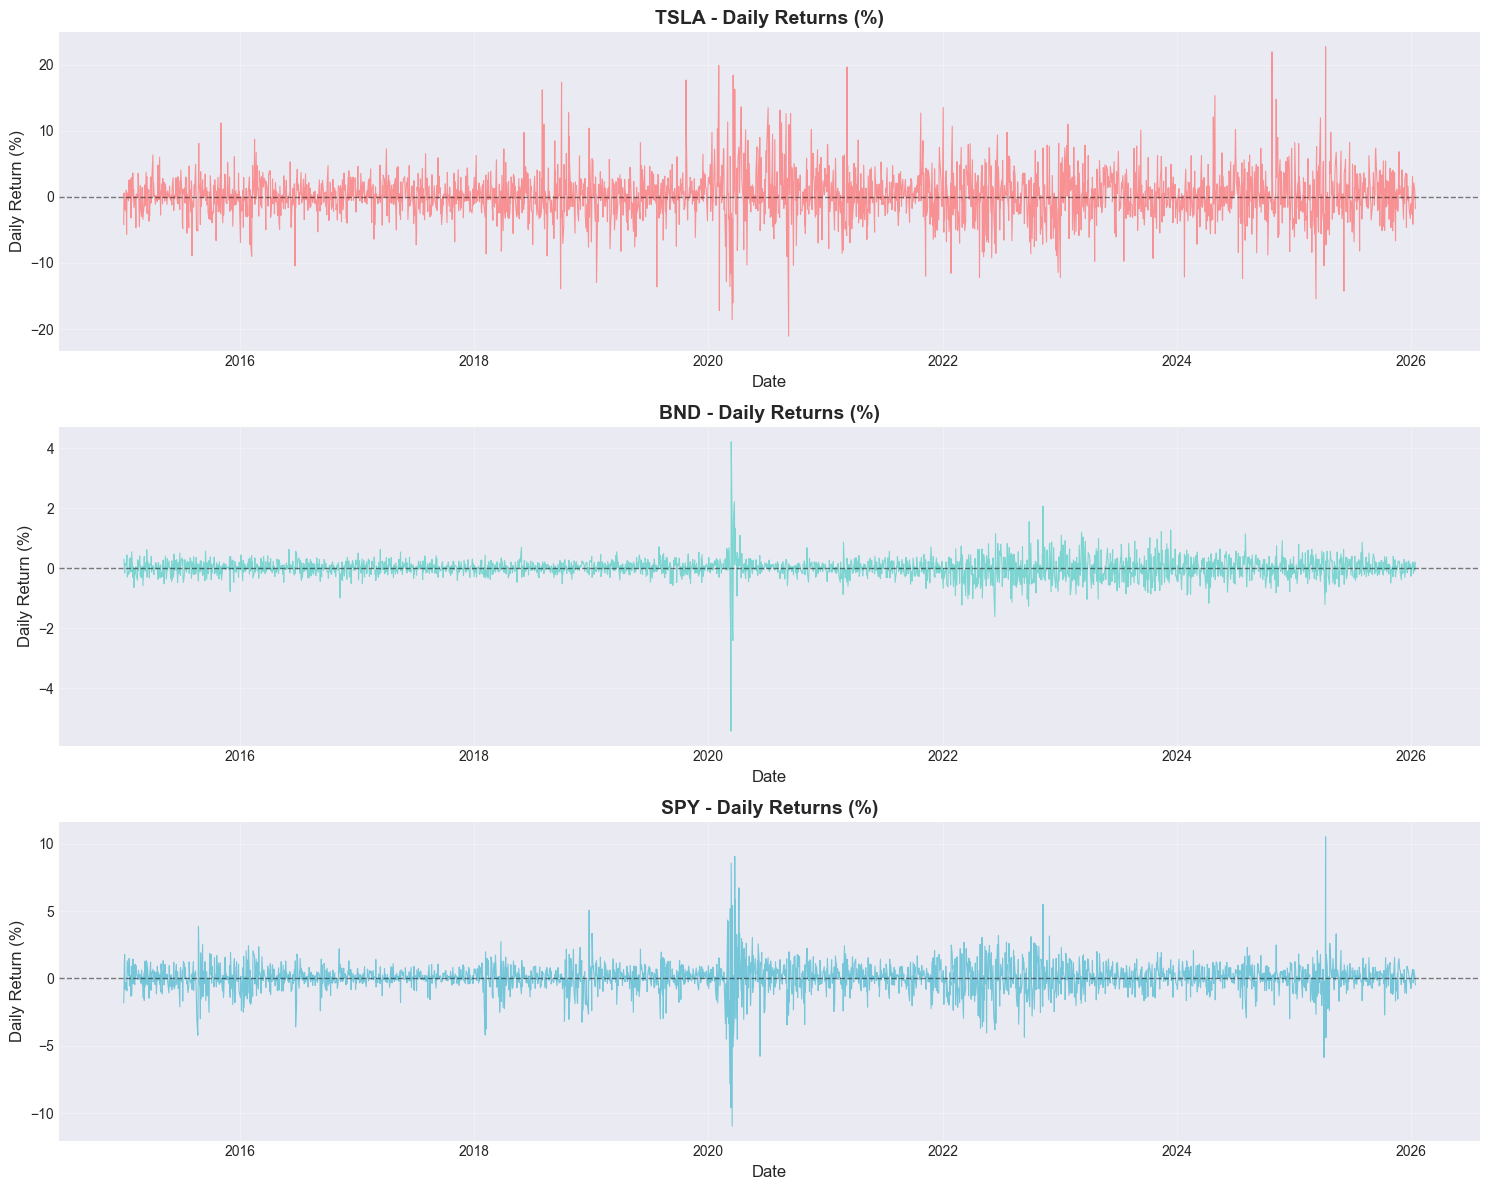

Daily Returns Statistics

TSLA:
  Mean Daily Return: 0.1885%
  Std Dev (Volatility): 3.6343%
  Min Daily Return: -21.0628%
  Max Daily Return: 22.6900%

BND:
  Mean Daily Return: 0.0081%
  Std Dev (Volatility): 0.3374%
  Min Daily Return: -5.4385%
  Max Daily Return: 4.2201%

SPY:
  Mean Daily Return: 0.0567%
  Std Dev (Volatility): 1.1193%
  Min Daily Return: -10.9424%
  Max Daily Return: 10.5019%


In [10]:
# Calculate daily returns (percentage change)
returns = {}
for ticker in tickers:
    close_prices = data[ticker]['Close']
    # Handle both Series and DataFrame cases
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]
    
    returns[ticker] = close_prices.pct_change() * 100
    data[ticker]['Daily_Return'] = returns[ticker]

# Plot daily returns
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

for idx, ticker in enumerate(tickers):
    axes[idx].plot(returns[ticker].index, returns[ticker], 
                   color=colors[idx], linewidth=0.8, alpha=0.7)
    axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    axes[idx].set_title(f'{ticker} - Daily Returns (%)', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=12)
    axes[idx].set_ylabel('Daily Return (%)', fontsize=12)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Daily returns statistics
print("Daily Returns Statistics")
print("="*60)
for ticker in tickers:
    mean_ret = float(returns[ticker].mean())
    std_ret = float(returns[ticker].std())
    min_ret = float(returns[ticker].min())
    max_ret = float(returns[ticker].max())
    
    print(f"\n{ticker}:")
    print(f"  Mean Daily Return: {mean_ret:.4f}%")
    print(f"  Std Dev (Volatility): {std_ret:.4f}%")
    print(f"  Min Daily Return: {min_ret:.4f}%")
    print(f"  Max Daily Return: {max_ret:.4f}%")

### 3.3 Rolling Mean and Standard Deviation (Volatility Analysis)

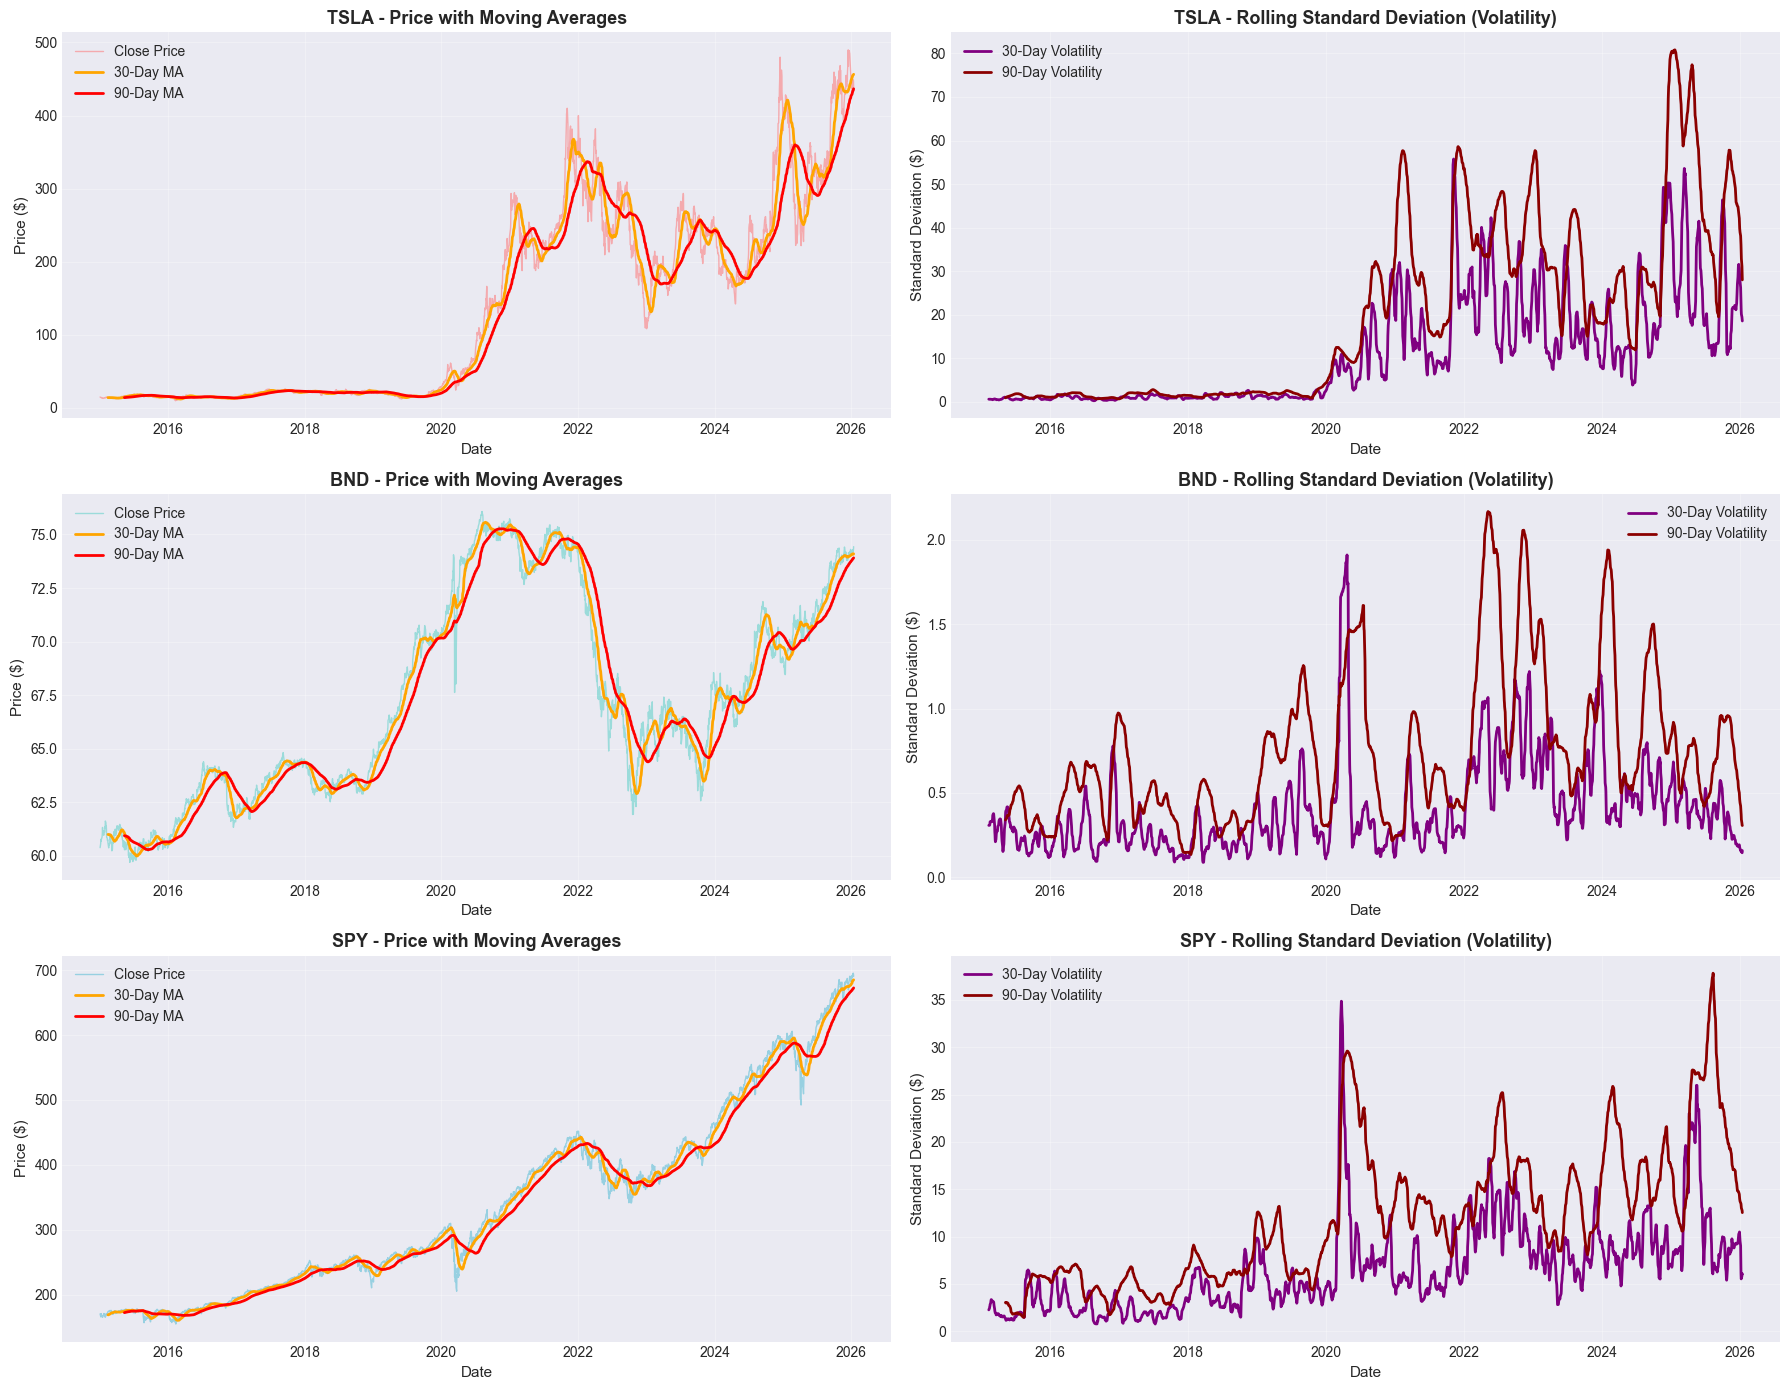

In [11]:
# Calculate rolling statistics (30-day and 90-day windows)
window_30 = 30
window_90 = 90

fig, axes = plt.subplots(3, 2, figsize=(18, 14))

for idx, ticker in enumerate(tickers):
    # Extract Close prices and handle potential Series/DataFrame differences
    close_prices = data[ticker]['Close']
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]
    
    # Rolling mean
    rolling_mean_30 = close_prices.rolling(window=window_30).mean()
    rolling_mean_90 = close_prices.rolling(window=window_90).mean()
    
    # Rolling standard deviation
    rolling_std_30 = close_prices.rolling(window=window_30).std()
    rolling_std_90 = close_prices.rolling(window=window_90).std()
    
    # Plot rolling means
    axes[idx, 0].plot(data[ticker].index, close_prices, 
                      label='Close Price', color=colors[idx], alpha=0.5, linewidth=1)
    axes[idx, 0].plot(rolling_mean_30.index, rolling_mean_30, 
                      label='30-Day MA', color='orange', linewidth=2)
    axes[idx, 0].plot(rolling_mean_90.index, rolling_mean_90, 
                      label='90-Day MA', color='red', linewidth=2)
    axes[idx, 0].set_title(f'{ticker} - Price with Moving Averages', 
                           fontsize=13, fontweight='bold')
    axes[idx, 0].set_xlabel('Date', fontsize=11)
    axes[idx, 0].set_ylabel('Price ($)', fontsize=11)
    axes[idx, 0].legend(loc='best', fontsize=10)
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Plot rolling standard deviations
    axes[idx, 1].plot(rolling_std_30.index, rolling_std_30, 
                      label='30-Day Volatility', color='purple', linewidth=2)
    axes[idx, 1].plot(rolling_std_90.index, rolling_std_90, 
                      label='90-Day Volatility', color='darkred', linewidth=2)
    axes[idx, 1].set_title(f'{ticker} - Rolling Standard Deviation (Volatility)', 
                           fontsize=13, fontweight='bold')
    axes[idx, 1].set_xlabel('Date', fontsize=11)
    axes[idx, 1].set_ylabel('Standard Deviation ($)', fontsize=11)
    axes[idx, 1].legend(loc='best', fontsize=10)
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Distribution of Daily Returns

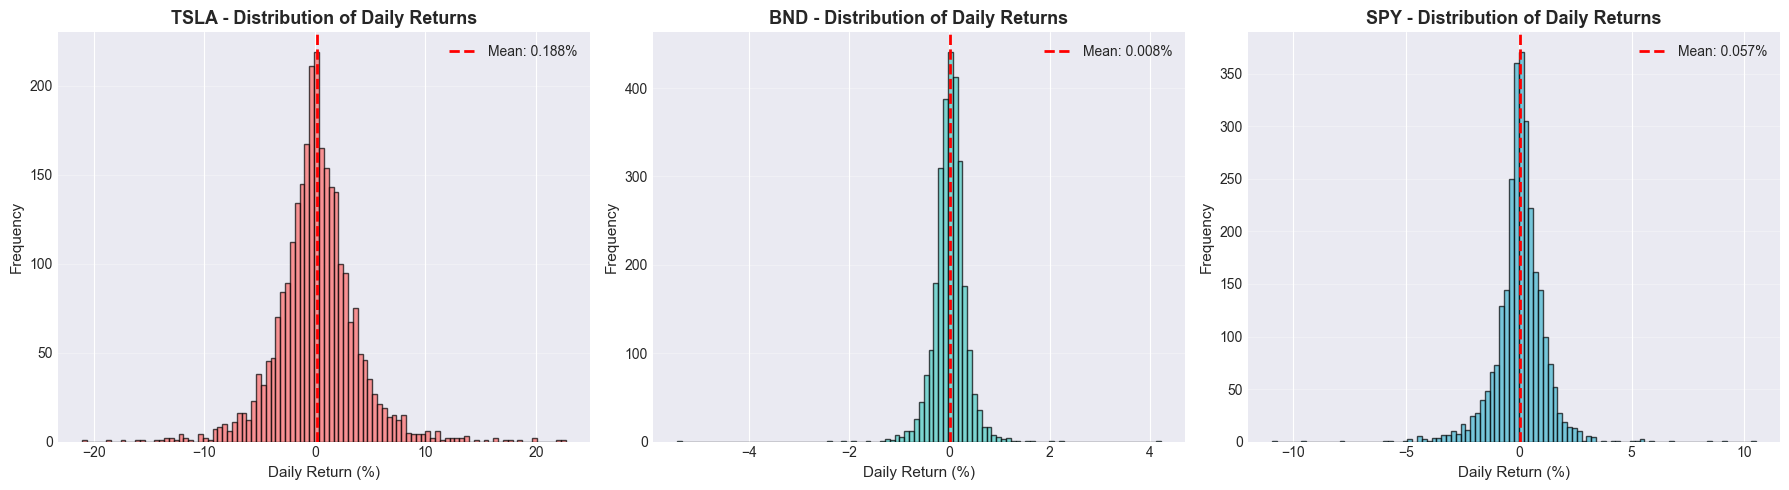

Distribution Statistics

TSLA:
  Skewness: 0.2902
  Kurtosis: 4.4563
  Interpretation: Fairly symmetric distribution

BND:
  Skewness: -0.9275
  Kurtosis: 36.7540
  Interpretation: Left-skewed (negative tail)

SPY:
  Skewness: -0.3128
  Kurtosis: 14.2049
  Interpretation: Fairly symmetric distribution


In [12]:
# Histogram and distribution of daily returns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, ticker in enumerate(tickers):
    axes[idx].hist(returns[ticker].dropna(), bins=100, color=colors[idx], 
                   alpha=0.7, edgecolor='black')
    axes[idx].axvline(returns[ticker].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {returns[ticker].mean():.3f}%')
    axes[idx].set_title(f'{ticker} - Distribution of Daily Returns', 
                        fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Daily Return (%)', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print("Distribution Statistics")
print("="*60)
for ticker in tickers:
    skewness = returns[ticker].skew()
    kurtosis = returns[ticker].kurtosis()
    print(f"\n{ticker}:")
    print(f"  Skewness: {skewness:.4f}")
    print(f"  Kurtosis: {kurtosis:.4f}")
    print(f"  Interpretation: ", end="")
    if abs(skewness) < 0.5:
        print("Fairly symmetric distribution")
    elif skewness > 0:
        print("Right-skewed (positive tail)")
    else:
        print("Left-skewed (negative tail)")

### 3.5 Outlier Detection - Extreme Returns

In [13]:
# Identify outliers using z-score method (>3 or <-3)
print("Outlier Analysis - Days with Extreme Returns")
print("="*60)

for ticker in tickers:
    returns_clean = returns[ticker].dropna()
    z_scores = np.abs(stats.zscore(returns_clean))
    outliers = returns_clean[z_scores > 3]
    
    print(f"\n{ticker}:")
    print(f"  Number of outlier days: {len(outliers)}")
    print(f"  Percentage: {(len(outliers)/len(returns_clean))*100:.2f}%")
    
    if len(outliers) > 0:
        print(f"\n  Top 5 Most Extreme Days:")
        top_5 = outliers.abs().nlargest(5)
        for date, value in top_5.items():
            actual_return = returns_clean.loc[date]
            print(f"    {date.date()}: {actual_return:+.2f}%")

Outlier Analysis - Days with Extreme Returns

TSLA:
  Number of outlier days: 44
  Percentage: 1.59%

  Top 5 Most Extreme Days:
    2025-04-09: +22.69%
    2024-10-24: +21.92%
    2020-09-08: -21.06%
    2020-02-03: +19.89%
    2021-03-09: +19.64%

BND:
  Number of outlier days: 32
  Percentage: 1.15%

  Top 5 Most Extreme Days:
    2020-03-12: -5.44%
    2020-03-13: +4.22%
    2020-03-18: -2.41%
    2020-03-23: +2.21%
    2022-11-10: +2.07%

SPY:
  Number of outlier days: 39
  Percentage: 1.41%

  Top 5 Most Extreme Days:
    2020-03-16: -10.94%
    2025-04-09: +10.50%
    2020-03-12: -9.57%
    2020-03-24: +9.06%
    2020-03-13: +8.55%


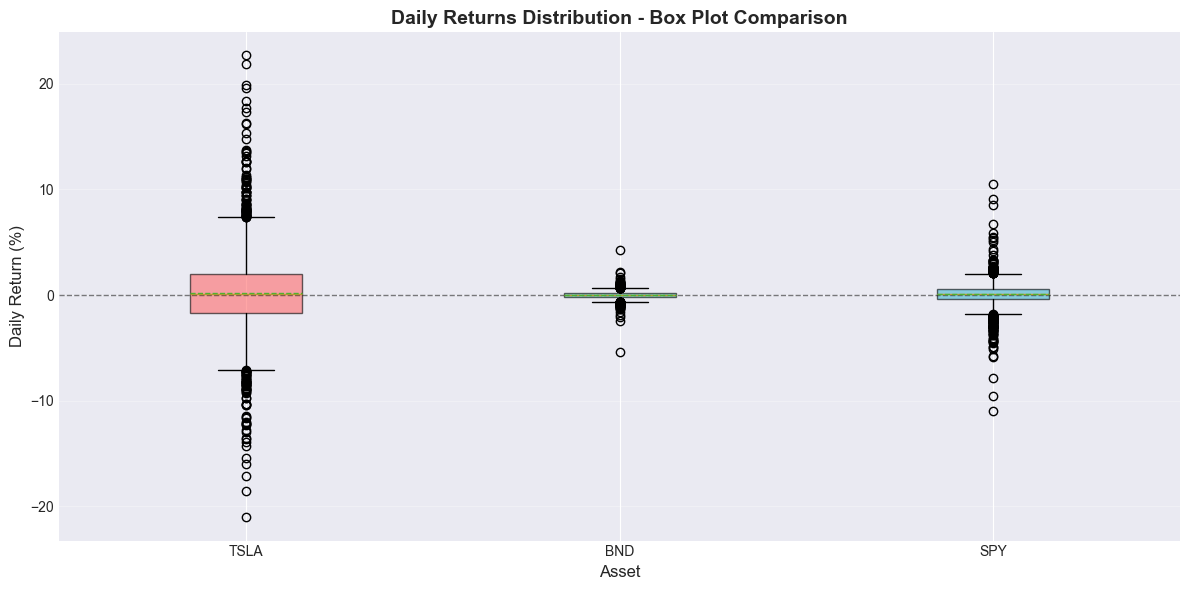

In [14]:
# Box plots to visualize outliers
fig, ax = plt.subplots(figsize=(12, 6))

returns_data = [returns[ticker].dropna() for ticker in tickers]
bp = ax.boxplot(returns_data, labels=tickers, patch_artist=True, 
                showmeans=True, meanline=True)

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_title('Daily Returns Distribution - Box Plot Comparison', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Daily Return (%)', fontsize=12)
ax.set_xlabel('Asset', fontsize=12)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 4. Stationarity Analysis (Augmented Dickey-Fuller Test)

In [15]:
def perform_adf_test(series, name):
    """Perform Augmented Dickey-Fuller test for stationarity"""
    result = adfuller(series.dropna(), autolag='AIC')
    
    print(f"\nADF Test Results for {name}")
    print("-" * 50)
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value: {result[1]:.6f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"  {key}: {value:.3f}")
    
    # Interpretation
    if result[1] < 0.05:
        print(f"\n✓ Series is STATIONARY (p < 0.05)")
        print(f"  → No differencing needed for modeling")
    else:
        print(f"\n✗ Series is NON-STATIONARY (p >= 0.05)")
        print(f"  → Differencing required for ARIMA modeling (d parameter)")
    
    return result

# Test stationarity on closing prices
print("="*60)
print("STATIONARITY TESTS - CLOSING PRICES")
print("="*60)

adf_results_prices = {}
for ticker in tickers:
    close_prices = data[ticker]['Close']
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]
    
    adf_results_prices[ticker] = perform_adf_test(close_prices, 
                                                   f"{ticker} Close Price")

STATIONARITY TESTS - CLOSING PRICES

ADF Test Results for TSLA Close Price
--------------------------------------------------
ADF Statistic: -0.780157
p-value: 0.824881
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567

✗ Series is NON-STATIONARY (p >= 0.05)
  → Differencing required for ARIMA modeling (d parameter)

ADF Test Results for BND Close Price
--------------------------------------------------
ADF Statistic: -1.051379
p-value: 0.734067
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567

✗ Series is NON-STATIONARY (p >= 0.05)
  → Differencing required for ARIMA modeling (d parameter)

ADF Test Results for SPY Close Price
--------------------------------------------------
ADF Statistic: 1.170880
p-value: 0.995778
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567

✗ Series is NON-STATIONARY (p >= 0.05)
  → Differencing required for ARIMA modeling (d parameter)


In [16]:
# Test stationarity on daily returns
print("\n" + "="*60)
print("STATIONARITY TESTS - DAILY RETURNS")
print("="*60)

adf_results_returns = {}
for ticker in tickers:
    adf_results_returns[ticker] = perform_adf_test(returns[ticker], 
                                                    f"{ticker} Daily Returns")


STATIONARITY TESTS - DAILY RETURNS

ADF Test Results for TSLA Daily Returns
--------------------------------------------------
ADF Statistic: -53.019619
p-value: 0.000000
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567

✓ Series is STATIONARY (p < 0.05)
  → No differencing needed for modeling

ADF Test Results for BND Daily Returns
--------------------------------------------------
ADF Statistic: -10.433745
p-value: 0.000000
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567

✓ Series is STATIONARY (p < 0.05)
  → No differencing needed for modeling

ADF Test Results for SPY Daily Returns
--------------------------------------------------
ADF Statistic: -17.228843
p-value: 0.000000
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567

✓ Series is STATIONARY (p < 0.05)
  → No differencing needed for modeling


In [17]:
### Stationarity Summary

print("\n" + "="*60)
print("STATIONARITY SUMMARY")
print("="*60)

summary_data = []
for ticker in tickers:
    summary_data.append({
        'Asset': ticker,
        'Price p-value': adf_results_prices[ticker][1],
        'Price Stationary': 'Yes' if adf_results_prices[ticker][1] < 0.05 else 'No',
        'Returns p-value': adf_results_returns[ticker][1],
        'Returns Stationary': 'Yes' if adf_results_returns[ticker][1] < 0.05 else 'No'
    })

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\n" + "="*60)
print("KEY IMPLICATIONS:")
print("="*60)
print("""
1. Closing Prices: Typically non-stationary (contain trends)
   → Require differencing for ARIMA models (d=1 or d=2)
   
2. Daily Returns: Usually stationary (no trend)
   → Can be modeled directly without differencing (d=0)
   → Better for volatility modeling (GARCH)
   
3. For Time Series Forecasting:
   - Use differenced prices or work directly with returns
   - ARIMA models: Test different values of d parameter
   - Consider seasonal components if present
""")


STATIONARITY SUMMARY

 Asset  Price p-value Price Stationary  Returns p-value Returns Stationary
 TSLA         0.8249               No           0.0000                Yes
  BND         0.7341               No           0.0000                Yes
  SPY         0.9958               No           0.0000                Yes

KEY IMPLICATIONS:

1. Closing Prices: Typically non-stationary (contain trends)
   → Require differencing for ARIMA models (d=1 or d=2)
   
2. Daily Returns: Usually stationary (no trend)
   → Can be modeled directly without differencing (d=0)
   → Better for volatility modeling (GARCH)
   
3. For Time Series Forecasting:
   - Use differenced prices or work directly with returns
   - ARIMA models: Test different values of d parameter
   - Consider seasonal components if present



## 5. Risk Metrics Calculation

### 5.1 Value at Risk (VaR)

In [18]:
# Calculate Value at Risk (VaR) at different confidence levels
confidence_levels = [0.90, 0.95, 0.99]

print("VALUE AT RISK (VaR) ANALYSIS")
print("="*60)
print("\nVaR represents the maximum expected loss over a given time period")
print("at a specified confidence level.\n")

var_results = {}
for ticker in tickers:
    print(f"\n{ticker} - Daily VaR:")
    print("-" * 40)
    var_results[ticker] = {}
    
    returns_clean = returns[ticker].dropna()
    
    for conf in confidence_levels:
        var_value = np.percentile(returns_clean, (1 - conf) * 100)
        var_results[ticker][conf] = var_value
        print(f"  {int(conf*100)}% VaR: {var_value:.2f}%")
        print(f"    → {int(conf*100)}% confident that daily loss won't exceed {abs(var_value):.2f}%")
    
    # Historical VaR (most commonly used)
    var_95 = var_results[ticker][0.95]
    print(f"\n  Risk Interpretation:")
    if abs(var_95) > 5:
        print(f"    HIGH RISK - Large potential daily losses")
    elif abs(var_95) > 2:
        print(f"    MODERATE RISK - Notable volatility")
    else:
        print(f"    LOW RISK - Relatively stable")

VALUE AT RISK (VaR) ANALYSIS

VaR represents the maximum expected loss over a given time period
at a specified confidence level.


TSLA - Daily VaR:
----------------------------------------
  90% VaR: -3.70%
    → 90% confident that daily loss won't exceed 3.70%
  95% VaR: -5.25%
    → 95% confident that daily loss won't exceed 5.25%
  99% VaR: -9.04%
    → 99% confident that daily loss won't exceed 9.04%

  Risk Interpretation:
    HIGH RISK - Large potential daily losses

BND - Daily VaR:
----------------------------------------
  90% VaR: -0.33%
    → 90% confident that daily loss won't exceed 0.33%
  95% VaR: -0.48%
    → 95% confident that daily loss won't exceed 0.48%
  99% VaR: -0.87%
    → 99% confident that daily loss won't exceed 0.87%

  Risk Interpretation:
    LOW RISK - Relatively stable

SPY - Daily VaR:
----------------------------------------
  90% VaR: -1.09%
    → 90% confident that daily loss won't exceed 1.09%
  95% VaR: -1.67%
    → 95% confident that daily loss w

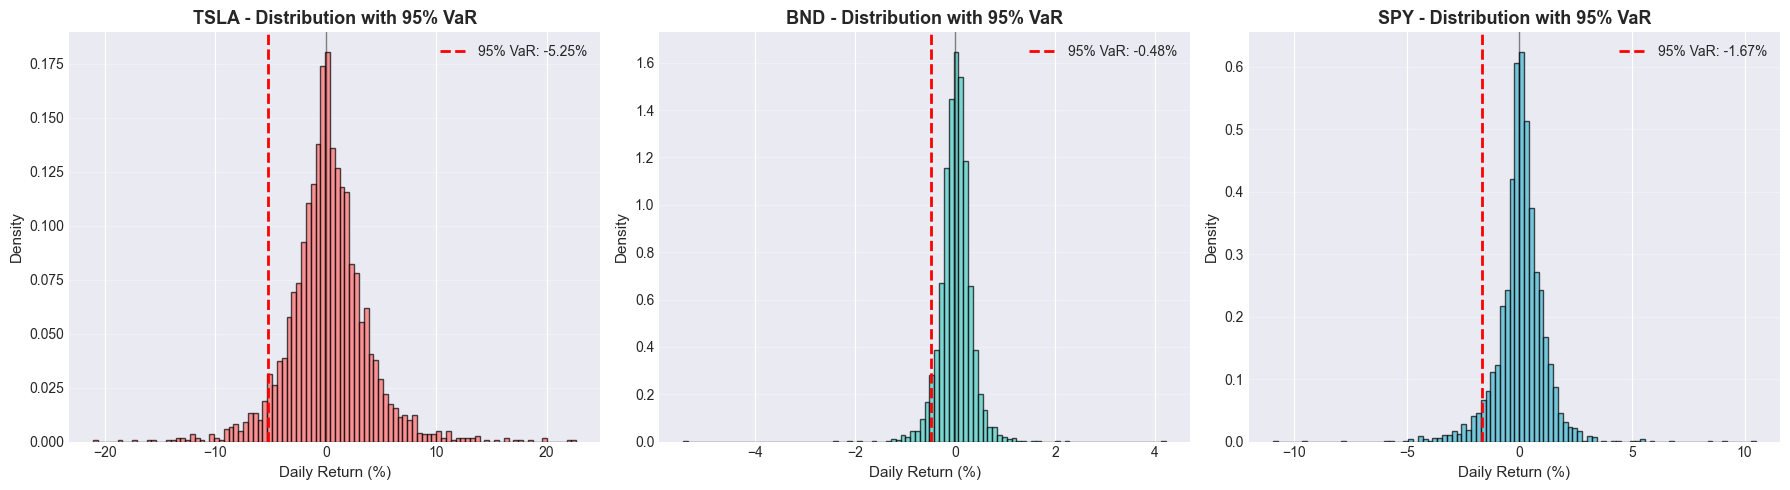

In [19]:
# Visualize VaR
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, ticker in enumerate(tickers):
    returns_clean = returns[ticker].dropna()
    
    axes[idx].hist(returns_clean, bins=100, color=colors[idx], 
                   alpha=0.7, edgecolor='black', density=True)
    
    # Add VaR lines
    var_95 = var_results[ticker][0.95]
    axes[idx].axvline(var_95, color='red', linestyle='--', linewidth=2, 
                      label=f'95% VaR: {var_95:.2f}%')
    axes[idx].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    
    axes[idx].set_title(f'{ticker} - Distribution with 95% VaR', 
                        fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Daily Return (%)', fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 5.2 Sharpe Ratio (Risk-Adjusted Returns)

In [20]:
# Calculate Sharpe Ratio
# Assuming risk-free rate of ~2% annually (0.008% daily approximately)
risk_free_rate_annual = 0.02
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1
risk_free_rate_daily_pct = risk_free_rate_daily * 100

print("SHARPE RATIO ANALYSIS")
print("="*60)
print(f"Risk-free rate (assumed): {risk_free_rate_annual*100:.1f}% annually")
print(f"                          {risk_free_rate_daily_pct:.4f}% daily\n")
print("Sharpe Ratio = (Mean Return - Risk-Free Rate) / Std Dev of Returns")
print("="*60)

sharpe_ratios = {}
for ticker in tickers:
    returns_clean = returns[ticker].dropna()
    
    # Daily Sharpe Ratio
    mean_return = returns_clean.mean()
    std_return = returns_clean.std()
    sharpe_daily = (mean_return - risk_free_rate_daily_pct) / std_return
    
    # Annualized Sharpe Ratio (more commonly reported)
    sharpe_annual = sharpe_daily * np.sqrt(252)
    
    sharpe_ratios[ticker] = {
        'daily': sharpe_daily,
        'annual': sharpe_annual,
        'mean_return': mean_return,
        'std_return': std_return
    }
    
    print(f"\n{ticker}:")
    print(f"  Mean Daily Return: {mean_return:.4f}%")
    print(f"  Daily Volatility (Std Dev): {std_return:.4f}%")
    print(f"  Daily Sharpe Ratio: {sharpe_daily:.4f}")
    print(f"  Annualized Sharpe Ratio: {sharpe_annual:.4f}")
    
    # Interpretation
    print(f"\n  Interpretation:")
    if sharpe_annual < 1:
        print(f"    POOR - Return doesn't adequately compensate for risk")
    elif sharpe_annual < 2:
        print(f"    ACCEPTABLE - Moderate risk-adjusted returns")
    elif sharpe_annual < 3:
        print(f"    GOOD - Strong risk-adjusted returns")
    else:
        print(f"    EXCELLENT - Outstanding risk-adjusted returns")

SHARPE RATIO ANALYSIS
Risk-free rate (assumed): 2.0% annually
                          0.0079% daily

Sharpe Ratio = (Mean Return - Risk-Free Rate) / Std Dev of Returns

TSLA:
  Mean Daily Return: 0.1885%
  Daily Volatility (Std Dev): 3.6343%
  Daily Sharpe Ratio: 0.0497
  Annualized Sharpe Ratio: 0.7889

  Interpretation:
    POOR - Return doesn't adequately compensate for risk

BND:
  Mean Daily Return: 0.0081%
  Daily Volatility (Std Dev): 0.3374%
  Daily Sharpe Ratio: 0.0007
  Annualized Sharpe Ratio: 0.0118

  Interpretation:
    POOR - Return doesn't adequately compensate for risk

SPY:
  Mean Daily Return: 0.0567%
  Daily Volatility (Std Dev): 1.1193%
  Daily Sharpe Ratio: 0.0436
  Annualized Sharpe Ratio: 0.6925

  Interpretation:
    POOR - Return doesn't adequately compensate for risk


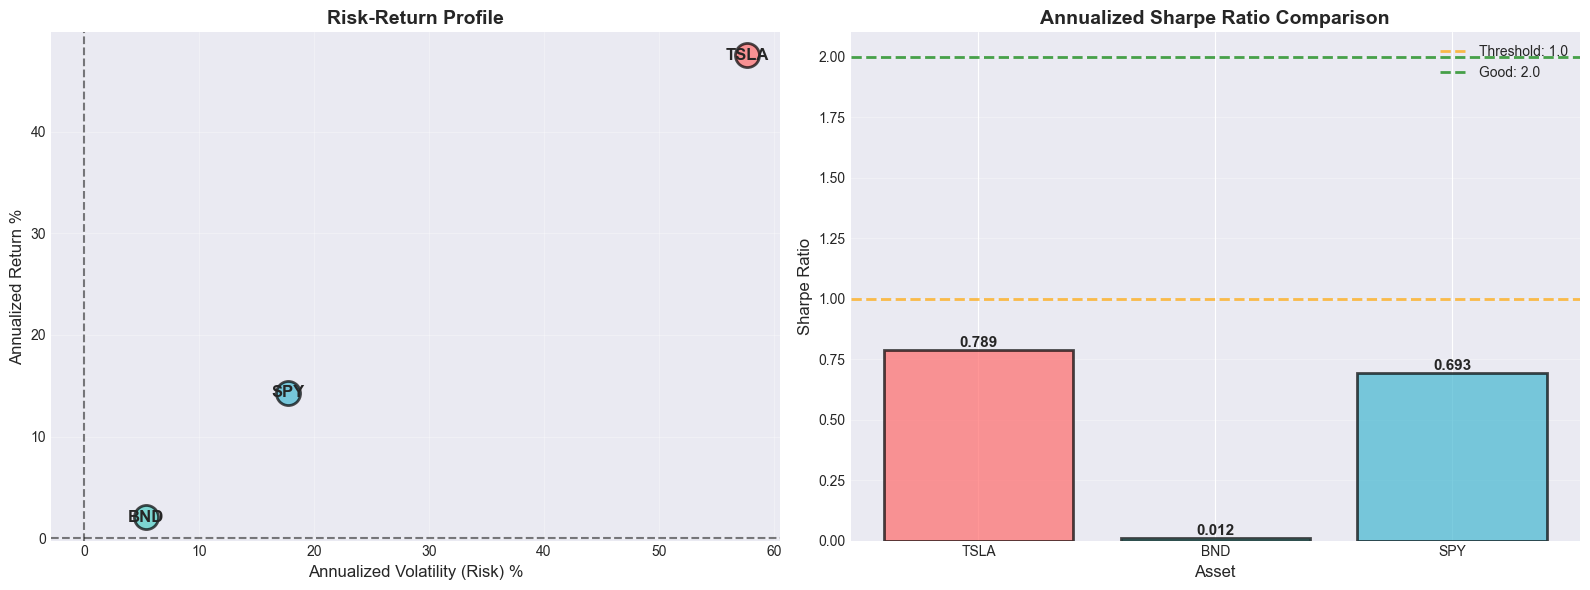

In [21]:
# Visualize Risk-Return Trade-off
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Risk-Return Scatter Plot
for idx, ticker in enumerate(tickers):
    mean_ret = sharpe_ratios[ticker]['mean_return'] * 252  # Annualized
    std_ret = sharpe_ratios[ticker]['std_return'] * np.sqrt(252)  # Annualized
    
    ax1.scatter(std_ret, mean_ret, s=300, color=colors[idx], 
                alpha=0.7, edgecolors='black', linewidth=2, label=ticker)
    ax1.annotate(ticker, (std_ret, mean_ret), fontsize=12, fontweight='bold',
                ha='center', va='center')

ax1.set_xlabel('Annualized Volatility (Risk) %', fontsize=12)
ax1.set_ylabel('Annualized Return %', fontsize=12)
ax1.set_title('Risk-Return Profile', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Sharpe Ratio Comparison
sharpe_values = [sharpe_ratios[ticker]['annual'] for ticker in tickers]
bars = ax2.bar(tickers, sharpe_values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, value in zip(bars, sharpe_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.axhline(y=1, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Threshold: 1.0')
ax2.axhline(y=2, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Good: 2.0')
ax2.set_ylabel('Sharpe Ratio', fontsize=12)
ax2.set_xlabel('Asset', fontsize=12)
ax2.set_title('Annualized Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis Between Assets

CORRELATION MATRIX - Daily Returns
       TSLA    BND    SPY
TSLA 1.0000 0.0539 0.4895
BND  0.0539 1.0000 0.1064
SPY  0.4895 0.1064 1.0000


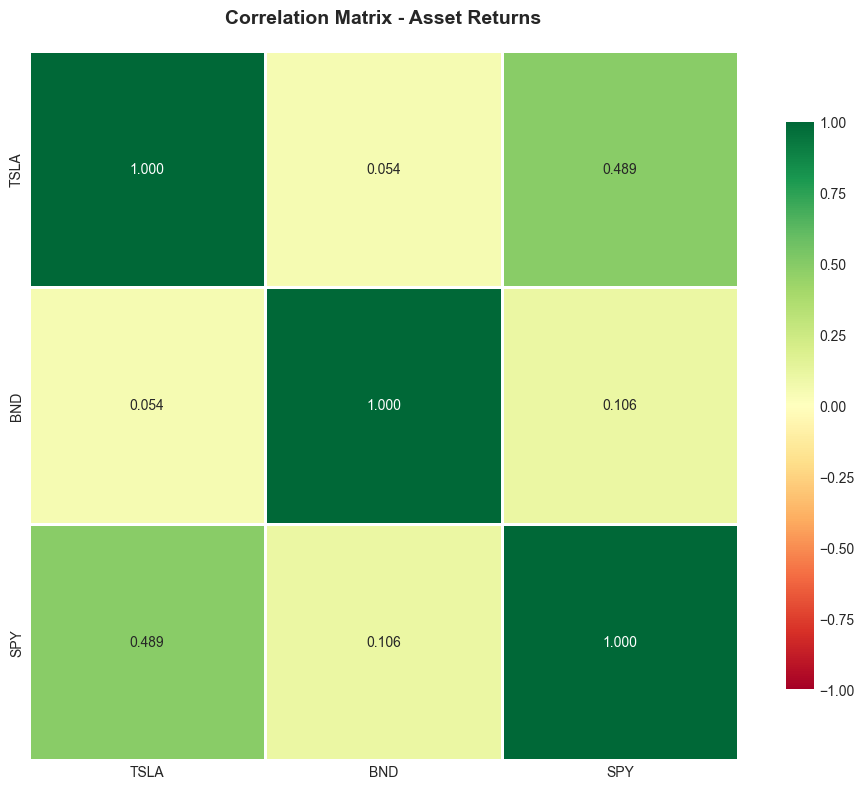


CORRELATION INSIGHTS:

- High positive correlation (>0.7): Assets move together → Less diversification benefit
- Low correlation (0.3-0.7): Moderate relationship → Some diversification
- Near zero correlation (<0.3): Independent movements → Good diversification
- Negative correlation (<0): Assets move opposite → Excellent diversification

Portfolio Implications:
- Combining negatively/low correlated assets reduces overall portfolio risk
- BND (bonds) typically have lower correlation with stocks (TSLA, SPY)
- This supports including BND for portfolio stability



In [22]:
# Create a combined dataframe of returns
returns_df = pd.DataFrame({
    'TSLA': returns['TSLA'],
    'BND': returns['BND'],
    'SPY': returns['SPY']
})

# Calculate correlation matrix
correlation_matrix = returns_df.corr()

print("CORRELATION MATRIX - Daily Returns")
print("="*60)
print(correlation_matrix)

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix - Asset Returns', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("CORRELATION INSIGHTS:")
print("="*60)
print("""
- High positive correlation (>0.7): Assets move together → Less diversification benefit
- Low correlation (0.3-0.7): Moderate relationship → Some diversification
- Near zero correlation (<0.3): Independent movements → Good diversification
- Negative correlation (<0): Assets move opposite → Excellent diversification

Portfolio Implications:
- Combining negatively/low correlated assets reduces overall portfolio risk
- BND (bonds) typically have lower correlation with stocks (TSLA, SPY)
- This supports including BND for portfolio stability
""")

## 7. Summary and Key Insights

In [24]:
# Comprehensive Summary Table
summary_table = []

for ticker in tickers:
    returns_clean = returns[ticker].dropna()
    
    # Get close prices and handle Series/DataFrame
    close_prices = data[ticker]['Close']
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]
    
    start_price = float(close_prices.iloc[0])
    end_price = float(close_prices.iloc[-1])
    
    summary_table.append({
        'Asset': ticker,
        'Total Return (%)': ((end_price / start_price) - 1) * 100,
        'Annualized Return (%)': float(returns_clean.mean()) * 252,
        'Annualized Volatility (%)': float(returns_clean.std()) * np.sqrt(252),
        'Sharpe Ratio': sharpe_ratios[ticker]['annual'],
        '95% VaR (%)': var_results[ticker][0.95],
        'Max Daily Gain (%)': float(returns_clean.max()),
        'Max Daily Loss (%)': float(returns_clean.min()),
        'Stationary (Returns)': 'Yes' if adf_results_returns[ticker][1] < 0.05 else 'No'
    })

summary_df = pd.DataFrame(summary_table)

print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY - ALL ASSETS")
print("="*80)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*80)

print("""
1. DATA QUALITY:
   ✓ All datasets are complete with no missing values
   ✓ Data covers the full period from 2015-01-01 to 2026-01-15
   ✓ All data types are appropriate for analysis

2. PRICE TRENDS:
   - TSLA: High growth but extremely volatile - High risk, high return profile
   - BND: Stable, low volatility - Safety and income generation
   - SPY: Steady growth with moderate volatility - Market benchmark

3. VOLATILITY:
   - TSLA shows highest volatility → Suitable for aggressive investors
   - BND shows lowest volatility → Suitable for conservative investors
   - SPY offers balanced risk-return → Suitable for moderate investors

4. STATIONARITY:
   - Closing prices: NON-STATIONARY (require differencing for ARIMA)
   - Daily returns: STATIONARY (can model directly)
   - Recommendation: Use differenced prices or work with returns

5. RISK METRICS:
   - VaR indicates potential downside risk for each asset
   - Sharpe Ratios show risk-adjusted performance
   - Higher Sharpe = Better risk-adjusted returns

6. PORTFOLIO CONSTRUCTION:
   - Low correlation between BND and equities (TSLA, SPY)
   - Diversification benefits from combining assets
   - Consider target risk tolerance when setting weights
""")


COMPREHENSIVE SUMMARY - ALL ASSETS
Asset  Total Return (%)  Annualized Return (%)  Annualized Volatility (%)  Sharpe Ratio  95% VaR (%)  Max Daily Gain (%)  Max Daily Loss (%) Stationary (Returns)
 TSLA         2903.9669                47.4914                    57.6923        0.7889      -5.2529             22.6900            -21.0628                  Yes
  BND           23.2572                 2.0434                     5.3567        0.0118      -0.4796              4.2201             -5.4385                  Yes
  SPY          304.6905                14.2850                    17.7676        0.6925      -1.6719             10.5019            -10.9424                  Yes

KEY INSIGHTS AND RECOMMENDATIONS

1. DATA QUALITY:
   ✓ All datasets are complete with no missing values
   ✓ Data covers the full period from 2015-01-01 to 2026-01-15
   ✓ All data types are appropriate for analysis

2. PRICE TRENDS:
   - TSLA: High growth but extremely volatile - High risk, high return profile
 

In [27]:
# Save processed data for future use
print("Saving processed data...")

for ticker in tickers:
    # Add returns column
    data[ticker]['Daily_Return'] = returns[ticker]
    
    # Save to CSV
    output_path = f'../data/processed/{ticker}_processed.csv'
    data[ticker].to_csv(output_path)
    print(f"✓ Saved {ticker} data to {output_path}")

# Save combined returns dataframe
returns_df.to_csv('../data/processed/all_returns.csv')
print(f"✓ Saved combined returns to ../data/processed/all_returns.csv")

# Save summary statistics
summary_df.to_csv('../data/processed/summary_statistics.csv', index=False)
print(f"✓ Saved summary statistics to ../data/processed/summary_statistics.csv")


Saving processed data...
✓ Saved TSLA data to ../data/processed/TSLA_processed.csv
✓ Saved BND data to ../data/processed/BND_processed.csv
✓ Saved SPY data to ../data/processed/SPY_processed.csv
✓ Saved combined returns to ../data/processed/all_returns.csv
✓ Saved summary statistics to ../data/processed/summary_statistics.csv
